In [37]:
import numpy as np
from data import gen_binary_data
from protocols.grr import GRR_Client, GRR_Aggregator_MI, GRR_Aggregator_IBU
from sklearn.metrics import mean_squared_error
from protocols.L_GRR import L_GRR_Client, L_GRR_Aggregator_MI, L_GRR_Client_Interaction

In [38]:
n = 100000
data = gen_binary_data(n=n, one_prob=0.3)
k = 2
eps = [0.2, 0.5, 0.9]
num_seed = 10
real_freq = np.unique(data, return_counts=True)[-1] / n
dic_mse = {seed: {
    "GRR": []
} for seed in range(num_seed)}
print(real_freq)
for seed in range(num_seed):
    ep = eps[1]
    grr_reports = [GRR_Client(input_data, k, ep) for input_data in data['v']]
    grr_est_freq = GRR_Aggregator_IBU(grr_reports, k, ep)
    print(f'Estimated frequency at seed: {seed}, epsilon: {ep}, ==> {grr_est_freq}')

    dic_mse[seed]["GRR"].append(grr_est_freq)
est_freq = np.mean([dic_mse[i]['GRR'] for i in range(num_seed)], axis=0)[0]
print(f'Average estimated: {est_freq}')

[0.70389 0.29611]
Estimated frequency at seed: 0, epsilon: 0.5, ==> [0.69533015 0.30466985]
Estimated frequency at seed: 1, epsilon: 0.5, ==> [0.70157713 0.29842287]
Estimated frequency at seed: 2, epsilon: 0.5, ==> [0.71382609 0.28617391]
Estimated frequency at seed: 3, epsilon: 0.5, ==> [0.70851821 0.29148179]
Estimated frequency at seed: 4, epsilon: 0.5, ==> [0.70794659 0.29205341]
Estimated frequency at seed: 5, epsilon: 0.5, ==> [0.70708916 0.29291084]
Estimated frequency at seed: 6, epsilon: 0.5, ==> [0.69353364 0.30646636]
Estimated frequency at seed: 7, epsilon: 0.5, ==> [0.70925314 0.29074686]
Estimated frequency at seed: 8, epsilon: 0.5, ==> [0.70831406 0.29168594]
Estimated frequency at seed: 9, epsilon: 0.5, ==> [0.70647671 0.29352329]
Average estimated: [0.70518649 0.29481351]


In [39]:
freqs = []
k=2
p = np.exp(eps[1]) / (np.exp(eps[1]) + k - 1)
q = (1 - p) / (k - 1)
print(f'p: {p}, q: {q}')
for seed in range(num_seed):
    ep = eps[1]
    grr_reports = [GRR_Client(input_data, k, ep) for input_data in data['v']]

    count_0 = 0
    n = len(grr_reports)
    for i in range(n):
        pb0 = est_freq[0]
        pb1 = est_freq[1]

        if grr_reports[i] == 0:
            numerator = p * pb0
            denominator = numerator + (q * pb1)
            # print(numerator, denominator)
            count_0 += np.random.binomial(1, numerator/denominator)

        if grr_reports[i] == 1:
            numerator = q * pb0
            denominator = numerator + (p * pb1)
            # print(numerator, denominator)
            count_0 += np.random.binomial(1, numerator/denominator)
    
    freqs.append(np.array([count_0, n-count_0])/np.sum(np.array([count_0, n-count_0])))

    


p: 0.6224593312018546, q: 0.3775406687981454


In [40]:
np.average(freqs, axis=0)

array([0.705217, 0.294783])

In [4]:
import numpy as np

eps = 2
eps1 = 1

def get_ps(eps):
    p = np.exp(eps)/(np.exp(eps) + 1)
    q = 1 - p
    return p,q

ps, qs = get_ps(eps)
p1, q1 = get_ps(eps1)

first = p1/q1
second = (ps * p1 + (1-ps)*(1-p1))/ (1-ps-p1+2*p1*ps)
print(first, second)

print(first+second < 2 * second)


2.7182818284590455 1.0
False


In [5]:
0.7 * 0.8 + 0.6 * 0.3

0.74

In [6]:
pb = np.array([0.7, 0.3])
pbstarb = np.array([[1, 2],[3, 4]])
pbb = np.array([
    [[5, 6], [7, 8]],
])

user = np.array([0])

print(pb.shape, pbstarb.shape, pbb.shape)

numerator = np.prod(pb[0], pbstarb[0][0], user[0][0]) +  np.prod(pb[0], pbstarb[1][0], user[0][0])


pbb = np.array([
    [[5, 6], [7, 8]],
    [[9, 10], [11, 12]]
])


(2,) (2, 2) (2, 2, 2)


In [60]:
pbb = np.array([
    [[5, 6], [7, 8]],
    [[9, 10], [11, 12]]
]
)
print(f'PBB: {pbb}')
print('_______')
user = np.array([0,1])

a = pbb[np.arange(len(pbb)),user][:,1]

print(f'A: {a}')
print('****')
print(np.prod(a))


PBB: [[[ 5  6]
  [ 7  8]]

 [[ 9 10]
  [11 12]]]
_______
A: [ 6 12]
****
72


In [52]:
pbb[0].shape

(2, 2)

In [53]:
pbb = np.array([
    [[5, 6], [7, 8]],
    [[9, 10], [11, 12]]
    
]
)

user = np.array([0,1])

a = []
for i in range(0, len(pbb)):
    a.append(pbb[i][user[i]])

print(a)

[array([5, 6]), array([11, 12])]


In [71]:
pb = np.array([0.7, 0.3])
pbstarb = np.array([[1, 2],[3, 4]])
pbb = pbb = np.array([
    [[5, 6], [7, 8]],
    [[9, 10], [11, 12]]
    ])
user = np.array([0,1])

numerator = pb[0]*pbstarb[0][0]* np.prod(pbb[np.arange(len(pbb)),user][:,0])  + pb[0]*pbstarb[1][0] * np.prod(pbb[np.arange(len(pbb)),user][:,1])
d_b_0 = numerator
d_b_1 = pb[1] * pbstarb[0][1] * np.prod(pbb[np.arange(len(pbb)),user][:,0]) + pb[1] * pbstarb[1][1] * np.prod(pbb[np.arange(len(pbb)),user][:,1])

denominator = d_b_0 + d_b_1

numerator / denominator



0.6137172436104821

In [74]:
num = 0.7 * 1 * 5 * 11 + 0.7 * 3 * 6 * 12
den = num + (  0.3 * 2 * 5 * 11 + 0.3 * 4 * 6 * 12  )
num/den


0.6137172436104821

In [66]:
(  0.3 * 2 * 5 * 9 + 0.3 * 4 * 6 * 12  )

113.39999999999999

In [39]:
pbb = np.array([
    [[5, 6], [7, 8]],
])
print(pbb.shape)
new_array = np.array([[[9, 10], [11, 12]]])
print(new_array.shape)
pbb = np.vstack((pbb, new_array))
print(pbb, pbb.shape)
pbb = np.vstack((pbb, new_array))
print(pbb, pbb.shape)


(1, 2, 2)
(1, 2, 2)
[[[ 5  6]
  [ 7  8]]

 [[ 9 10]
  [11 12]]] (2, 2, 2)
[[[ 5  6]
  [ 7  8]]

 [[ 9 10]
  [11 12]]

 [[ 9 10]
  [11 12]]] (3, 2, 2)


In [41]:
p_b_bstar = np.array([np.ones((2,2))])
p_b_bstar

array([[[1., 1.],
        [1., 1.]]])

In [58]:
np.random.binomial(1, 0.9)

1

In [7]:
0.6 * 2.6 - 0.4

1.1600000000000001

In [35]:
eps_perm = 2.6
e1 = 0.38
epsilons = np.array([[2.6, e1], [0.8, e1], [0.8, e1], [0.8, e1]])

# epsilons[:,1]
total_loss_minority = np.log((np.exp(eps_perm + epsilons[:,1].sum()) + 1) / (np.exp(eps_perm) + np.exp(epsilons[:,1].sum())))
total_loss_minority

1.243746262157857

In [14]:
1.16/3

0.38666666666666666

In [36]:
eps_perm = 2.6
e1 = 1.52
epsilons = np.array([[2.6, e1]])

# epsilons[:,1]
total_loss_single = np.log((np.exp(eps_perm + epsilons[:,1].sum()) + 1) / (np.exp(eps_perm) + np.exp(epsilons[:,1].sum())))
total_loss_single

1.243746262157857

In [44]:
eps_inf = 2.6
e1 = 0.38
our_epsilons = np.array([[2.6, e1], [0.8, e1], [0.8, e1], [0.8, e1]])

sota_epsilons = [[eps_inf, 1.52]]

our_mechanism_total_loss_for_minority = np.log((np.exp(eps_inf + our_epsilons[:,1].sum()) + 1) / (np.exp(eps_inf) + np.exp(our_epsilons[:,1].sum())))
sota_mechanism_total_loss = np.log((np.exp(eps_inf + 1.52) + 1) / (np.exp(eps_inf) + np.exp(1.52)))
print(our_mechanism_total_loss_for_minority, sota_mechanism_total_loss)

1.243746262157857 1.243746262157857


In [36]:
eps_inf = 2.6
e0 = 1
e1 = 0.05
our_epsilons = np.array([[2.6, e0], [0.8, e1], [0.8, e1], [0.8, e1]])

sotaeps1 = 1.52
sota_epsilons = [[eps_inf, sotaeps1]]

our_mechanism_total_loss_for_minority = np.log((np.exp(eps_inf + our_epsilons[:,1].sum()) + 1) / (np.exp(eps_inf) + np.exp(our_epsilons[:,1].sum())))
sota_mechanism_total_loss = np.log((np.exp(eps_inf + sotaeps1) + 1) / (np.exp(eps_inf) + np.exp(sotaeps1)))
print(our_mechanism_total_loss_for_minority, sota_mechanism_total_loss)

0.962522499702665 1.243746262157857


In [34]:
eps_inf = 2.6
e0 = 1.197813055590637
our_epsilons = np.array([[2.6, e0]])
                        
np.log((np.exp(eps_inf + our_epsilons[:,1].sum()) + 1) / (np.exp(eps_inf) + np.exp(our_epsilons[:,1].sum())))

0.9999999999999996

In [66]:
np.log((np.exp(eps_inf+4*e1)+1)/(np.exp(eps_inf)+np.exp(4*e1)))

1.243746262157857

In [ ]:
eps_inf = 2.6 
e1 = 0.8
a = np.exp(eps_inf) + np.exp(3*e1)
b = np.exp(eps_inf + (2 * e1)) + np.exp(e1)

1/a , 1/b

(0.04083813840428816, 0.014511287698639064)

In [113]:
total = 1.243746262157857
times = 2

eps_inf = 2.6 
np.log((1-np.exp(total+eps_inf))/(np.exp(total)-np.exp(eps_inf))) * 1/times

0.76

In [29]:
import numpy as np
total = 1.243746262157857
times = 2
e0 = 1
eps_inf = 2.6 
( np.log((1-np.exp(total+eps_inf))/(np.exp(total)-np.exp(eps_inf))) - e0) * 1/(times-1)

0.52

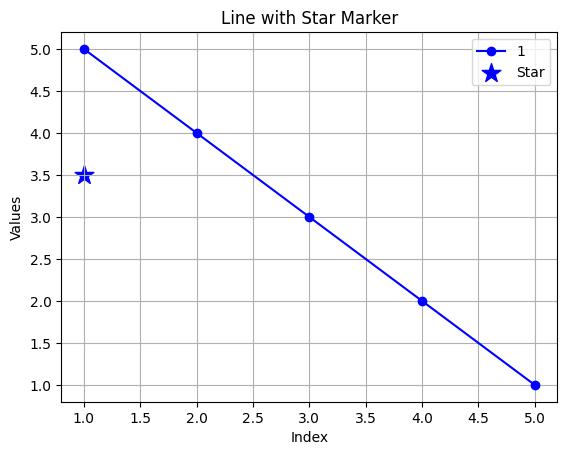

In [110]:
import matplotlib.pyplot as plt

# Define array a and value v
a = [5, 4, 3, 2, 1]
v = 3.5

# Plot the line based on array a
plt.plot(range(1,len(a)+1), a, marker='o', color='blue', label=f'{a[-1]}')

# Mark a star where y-axis corresponds to v
# Mark a star where y-axis corresponds to v
plt.scatter(1, v, color='blue', marker='*', s=200, label='Star')


# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Line with Star Marker')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [26]:
np.log(  (np.exp(2.6+1.52) + 1)/(np.exp(2.6)+ np.exp(1.52))    )

1.243746262157857

length: 199999
total below alpha 99
total above alpha 199899


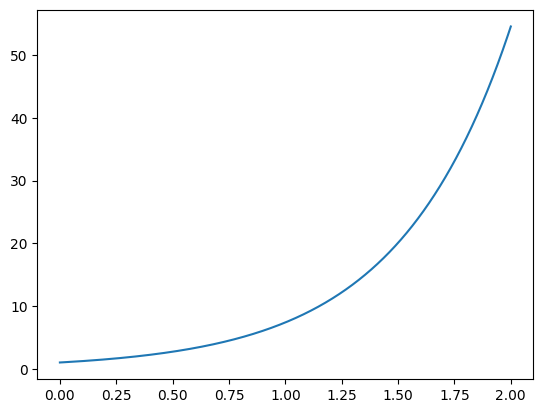

In [31]:
import numpy as np
import matplotlib.pyplot as plt
last = 2
d = np.arange(0.00001, last, 0.00001)

print(f'length: {len(d)}')
alpha = 0.001
print(f'total below alpha {len(d[d<alpha])}')
print(f'total above alpha {len(d[d>alpha])}')

def func(diff):
    
    k1 = 1
    k2 = 1
    k3 = 2
    if diff < alpha:
        return k1 * np.exp(diff)
    else:
        return k2 * np.exp(k3* diff)
r = [func(i) for i in d]


plt.plot(d,r)

In [32]:
np.arange(2)

array([0, 1])